# Sinusodial Model Experiment
deterministic model using sinusodial function fitted on sample data.

## intial experiment
- train sinusodial regression on sample of data monday - thursday
- get some regression function where we can input time from start and it will give us fullness
- modify data set so instead of time stamps each time stamp represents number of hours from start of day 0:00 hours, mins
represents monday 12:00am
- train data with x as that modified timestamp and y as the fullness for some sample of data from monday-thursday


## future experiment
- sinusodial model is for each garage
- look to train with compounded data of more points in a week
- also can test what inverse would get us, first data point in front of current time

## imports

In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../lib")))

from data_load import load_data

## perform regression

In [2]:
# model for NORTH garage
date_start = pd.to_datetime("2025-03-10 12:00:00 AM")
date_end = pd.to_datetime("2025-03-14 12:00:00 AM")

# Example sinusoidal function
def sinusoidal_model(x, A, B, C, D):
    return A * np.sin(B * x + C) + D

# TODO load data
wdir = os.getcwd()
data_folder_dir = wdir + "/../scrape/out/"

all_data = load_data(data_folder_dir)

north_data = all_data[all_data['garage name'] == "North Garage"]
north_data = north_data[(north_data['timestamp'] >= date_start) & (north_data['timestamp'] <= date_end)]

# replace time stamps with time from date_start in minutes instead
north_data['time'] = (north_data['timestamp'] - date_start).dt.total_seconds() / 60

# Extract x and y
x_data = north_data['time']
y_data = north_data['fullness']

# manually make curve with weights
initial_guess = [50, 0.005, 500, 50]
params, _ = curve_fit(sinusoidal_model, x_data, y_data, p0=initial_guess)

y_fit = sinusoidal_model(x_data, *params)

# make sine curve using
x_temp_data = [x for x in range(int(x_data.tail(1).values[0]))]
y_guess_data = [sinusoidal_model(x, *initial_guess) for x in x_temp_data]

## plot data

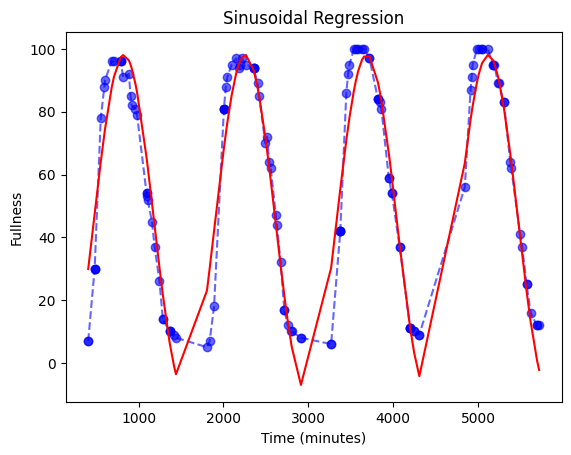

In [3]:
# Plot the data and the fitted curve
plt.scatter(x_data, y_data, color='blue', alpha=0.6)
plt.plot(x_data, y_data, color='blue', alpha=0.6, linestyle='--')
plt.plot(x_data, y_fit, color='red')
# initial guess only plot
# plt.plot(x_temp_data, y_guess_data, label='Guess Sinusoidal Curve', color='orange')
plt.xlabel('Time (minutes)')
plt.ylabel('Fullness')
plt.title('Sinusoidal Regression')
plt.show()